In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt 
import numpy as np
import os,sys
caffe_root = os.environ["CAFFE_ROOT"]
os.chdir(caffe_root)                     
print caffe_root                         
sys.path.insert(0, caffe_root + 'python')
import caffe                                                                      
caffe.set_mode_gpu()                     
caffe.set_device(1)                      

dir_t = "/home/maohz12/pruning/2_results/kmeans/alexnet/"

/home/maohz12/pruning/


In [6]:
accu_top1 = numpy.load(dir_t + 'accu_top1_2models.npy')
accu_top5 = numpy.load(dir_t + 'accu_top5_2models.npy')
prototxt = '/home/maohz12/pruning/3_prototxt_solver/L2/train_val.prototxt'  
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/alexnet/alexnet.caffemodel' 
net = caffe.Net(prototxt, caffemodel, caffe.TEST)

layers = filter(lambda x:'conv' in x or 'fc' in x or 'ip' in x, net.params.keys())  
layers = map(lambda x: [x], layers)                                                 
layers.append(filter(lambda x: 'conv' in x, net.params.keys()))                     
layers.append(filter(lambda x: 'fc' in x or 'ip' in x, net.params.keys()))   
layers.append(filter(lambda x: 'conv' in x or 'fc' in x or 'ip' in x, net.params.keys()))  
bits_list = np.array([1,2,3,4,5,6,7,8])                                                              

             alexnet                           alexnet6x                           alexnet9x
['conv1']


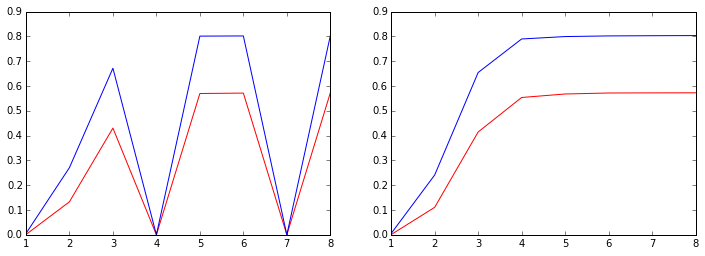

['conv2']


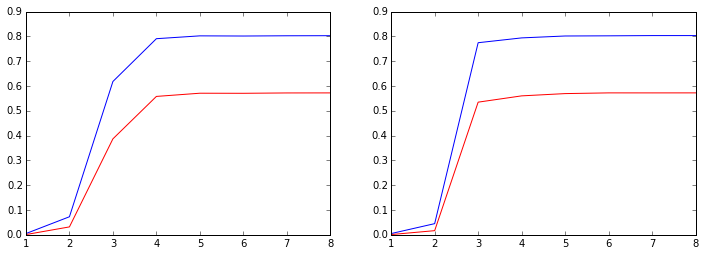

['conv3']


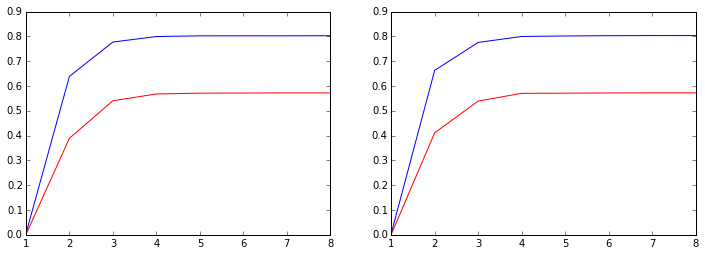

['conv4']


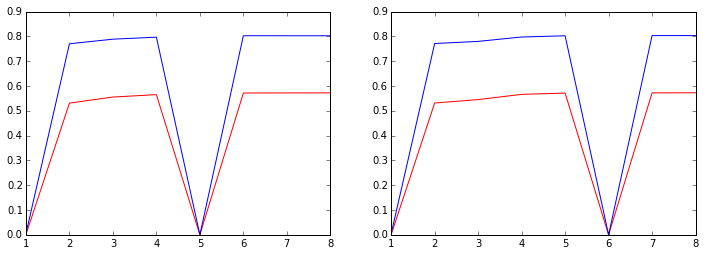

['conv5']


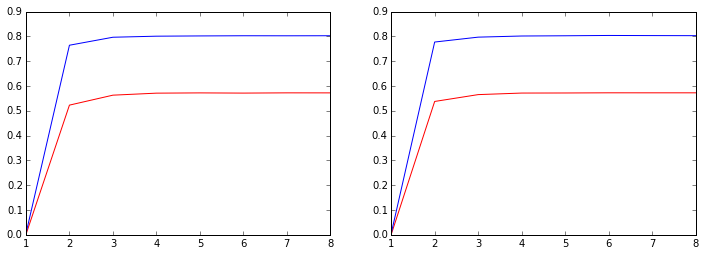

['fc6']


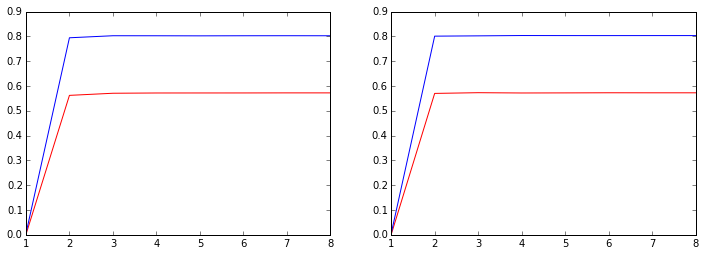

['fc7']


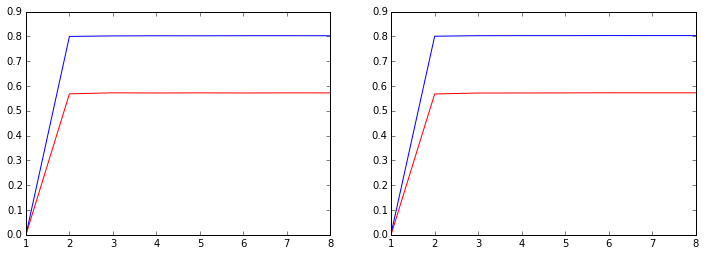

['fc8']


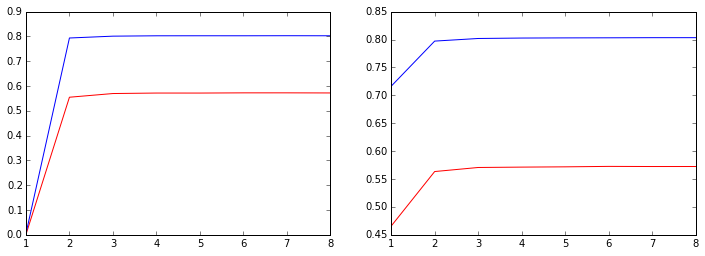

['conv1', 'conv2', 'conv3', 'conv4', 'conv5']


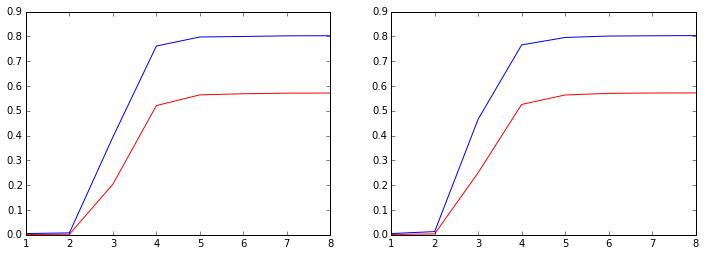

['fc6', 'fc7', 'fc8']


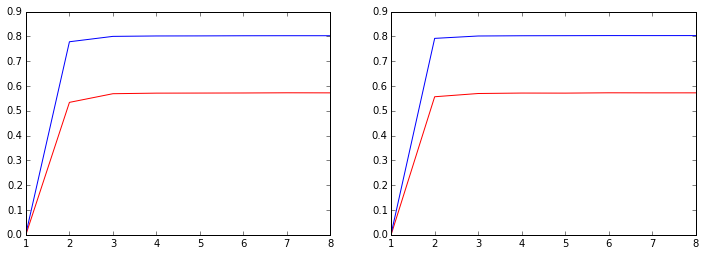

['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']


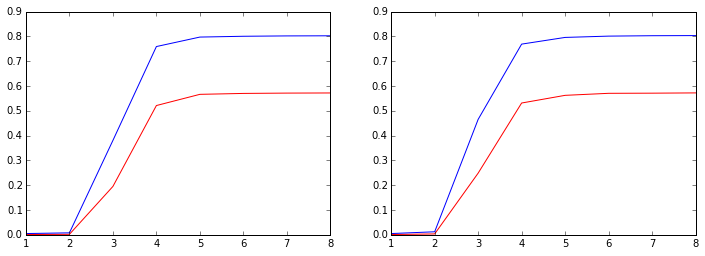

In [8]:
print "%20s%36s%36s"%("alexnet", "alexnet6x", "alexnet9x")
for i, layer in enumerate(layers):
    print layer
    plt.figure(figsize=(12,4))
    for j in range(2):
        plt.subplot(1,2,j+1)
        plt.plot(bits_list, accu_top1[j,i], c='red')
        plt.plot(bits_list, accu_top5[j,i], c='blue')
        
        
    plt.show()
    

In [ ]:
num = 10
bits_max = np.zeros((len(layers), num))
bits = [1,2,4,8,16]
for i in range(num):
    thresh = i * 0.01+0.01
    for idx, layer in enumerate(layers):
        accu = np.append(accu_top5[2,idx], 0.8032)
        x = np.where(0.8032- accu < thresh)[0][0]
     
        bits_max[idx, i] = bits[x]

for idx, layer in enumerate(layers):
    print layer
    plt.plot(np.arange(0.01,0.11,0.01), bits_max[idx])
    plt.show()
            

['conv1']


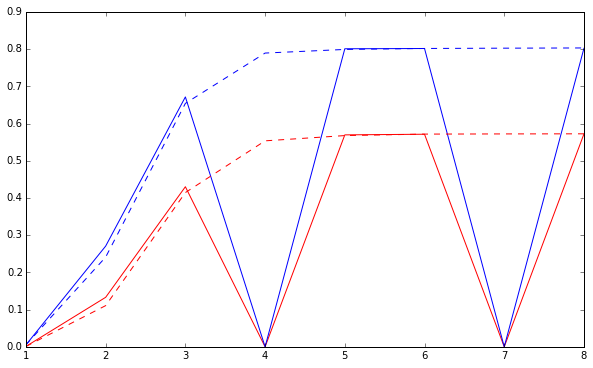

['conv2']


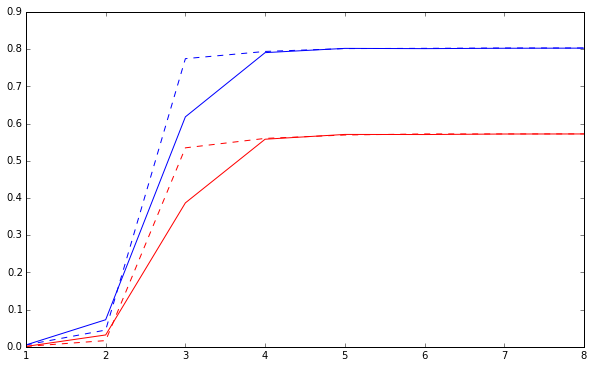

['conv3']


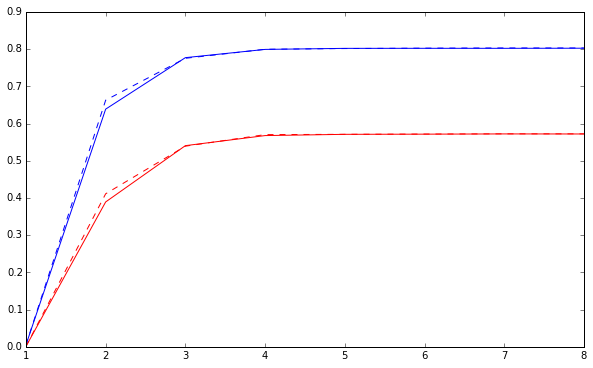

['conv4']


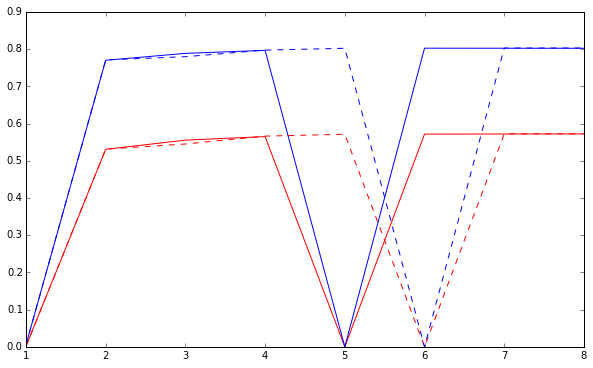

['conv5']


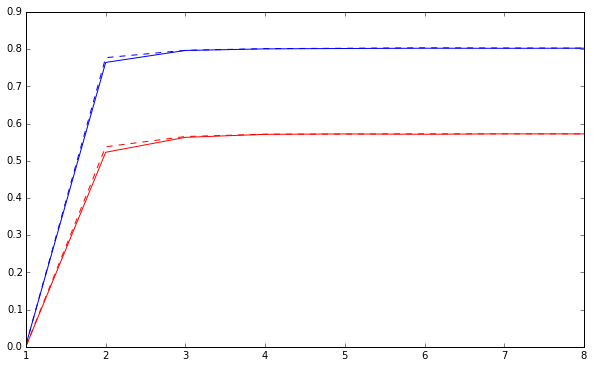

['fc6']


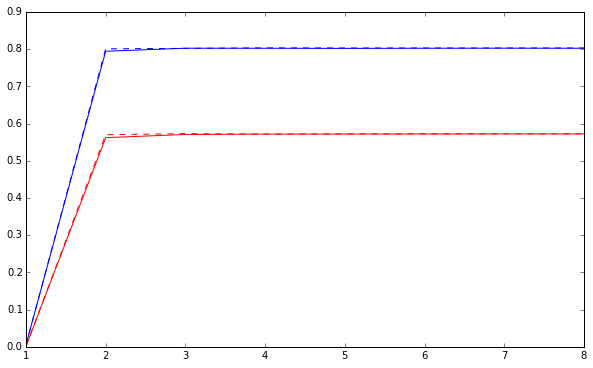

['fc7']


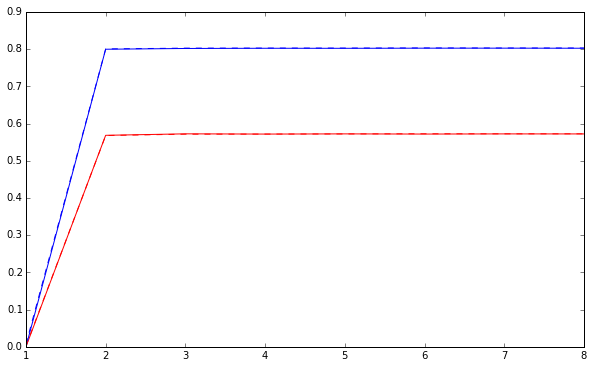

['fc8']


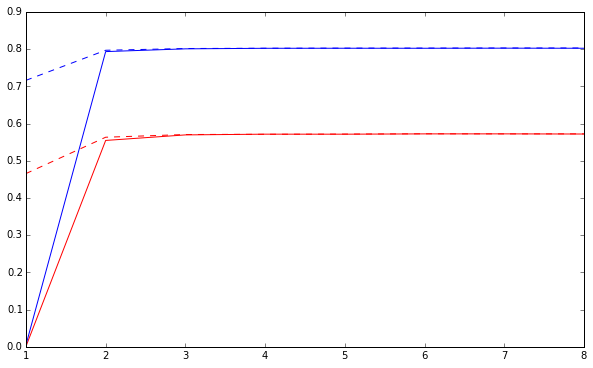

['conv1', 'conv2', 'conv3', 'conv4', 'conv5']


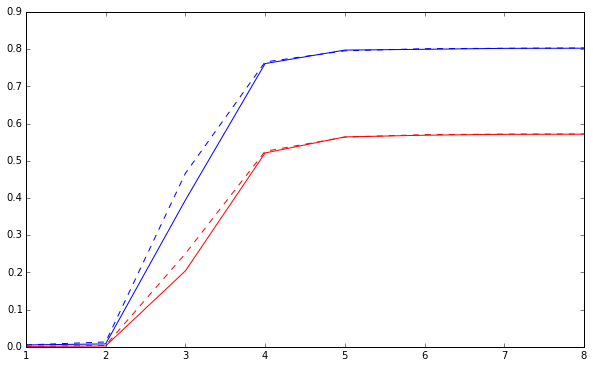

['fc6', 'fc7', 'fc8']


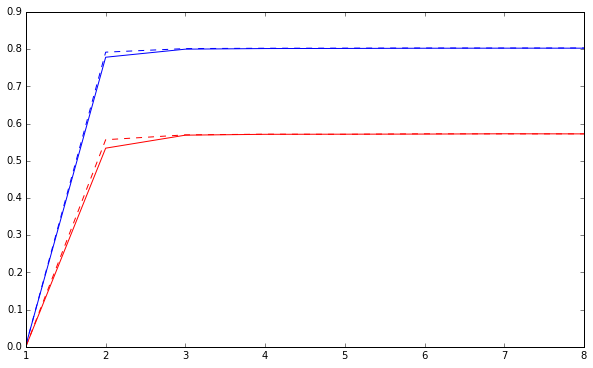

['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']


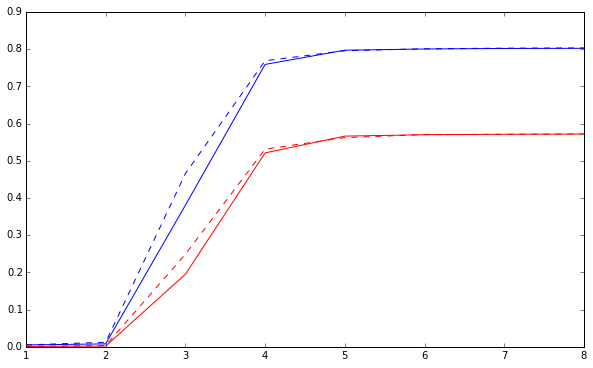

In [10]:
for i, layer in enumerate(layers):
    print layer
    plt.figure(figsize=(10,6))
        
    plt.plot(bits_list, accu_top1[0,i], c='red')
    plt.plot(bits_list, accu_top5[0,i], c='blue')
    plt.plot(bits_list, accu_top1[1,i], c='red', ls='--')
    plt.plot(bits_list, accu_top5[1,i], c='blue',ls='--')
        
    plt.show()

In [14]:
f = open('layer_model_res.csv','w')
f.write('layers, model, bits, top1, top5\n')
model = ('original','pruned')
for i, layer in enumerate(layers):
    print layer
    for j in range(2):
        for k in range(len(bits_list)):
            f.write('%s, %s, %d, %f, %f\n'%(' '.join(layer), model[j], bits_list[k], accu_top1[j,i,k], accu_top5[j,i,k]))
f.close()


['conv1']
['conv2']
['conv3']
['conv4']
['conv5']
['fc6']
['fc7']
['fc8']
['conv1', 'conv2', 'conv3', 'conv4', 'conv5']
['fc6', 'fc7', 'fc8']
['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']
